The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP)  of the plant.
A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. 

In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is colected from and has effect on the Steam Turbine, he other three of the ambient variables effect the GT performance.

For comparability with our baseline studies, and to allow 5x2 fold statistical tests be carried out, we provide the data shuffled five times. For each shuffling 2-fold CV is carried out and the resulting 10 measurements are used for statistical testing.


# Import the libraries

In [4]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Read the data

In [5]:
power_data = pd.read_excel("Folds5x2_pp.xlsx")

Check the shape of data

In [6]:
power_data.shape

(9568, 5)

Check the columns

In [7]:
power_data.columns

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

Check the data

In [9]:
power_data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [10]:
power_data.tail()

,AT,V,AP,RH,PE
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74
9567,21.60,62.52,1017.23,67.87,453.28


check the column data

In [11]:
power_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


find missing values in the dataset

In [12]:
print(f'Any NaN values? {power_data.isna().values.any()}')

Any NaN values? False


find duplicates in the dataset

In [14]:
print(f'Any duplicates? {power_data.duplicated().values.any()}')

Any duplicates? True


Remove the duplicates in the dataset

In [15]:
power_data = power_data[power_data.duplicated()]

Check the data size again

In [17]:
power_data.shape

(41, 5)

Check the statistics by describing the data

In [18]:
power_data.describe()

,AT,V,AP,RH,PE
count,41.000000,41.000000,41.000000,41.000000,41.000000
mean,18.026098,57.183171,1018.369756,67.273659,461.126829
std,9.102790,16.956917,2.081929,11.428436,21.868466
min,6.030000,41.170000,1010.450000,50.610000,431.180000
25%,9.540000,41.170000,1017.460000,56.850000,440.050000
50%,12.270000,41.170000,1019.340000,68.230000,473.840000
75%,26.450000,75.600000,1019.570000,75.630000,481.180000
max,29.510000,75.600000,1020.350000,86.430000,490.230000


Visualise the data using the seaborn library 

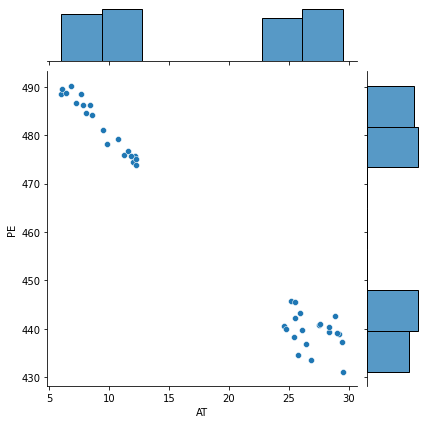

In [19]:
sns.jointplot(x=power_data['AT'], y=power_data['PE'])

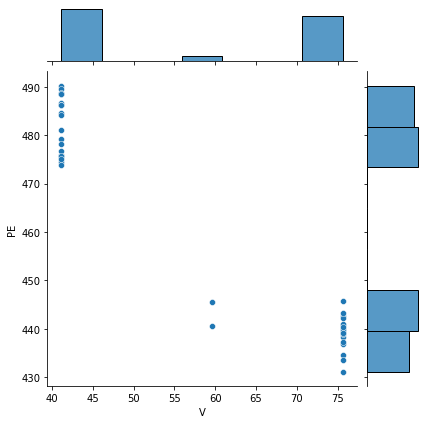

In [20]:
sns.jointplot(x=power_data['V'], y=power_data['PE'])

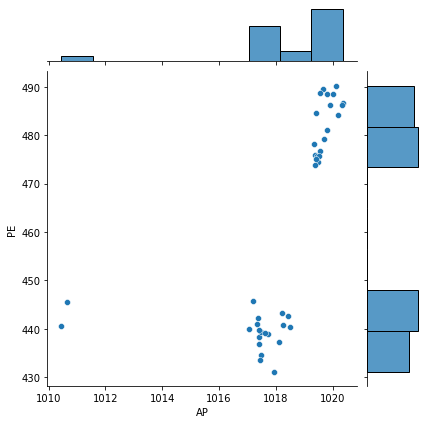

In [21]:
sns.jointplot(x=power_data['AP'], y=power_data['PE'])

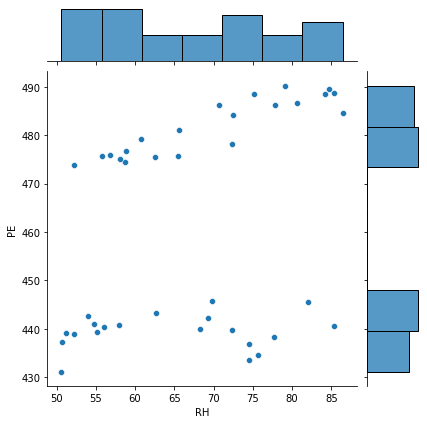

In [22]:
sns.jointplot(x=power_data['RH'], y=power_data['PE'])

In [23]:
%matplotlib inline

Visualise using the matplotlib

Text(0, 0.5, 'PE')

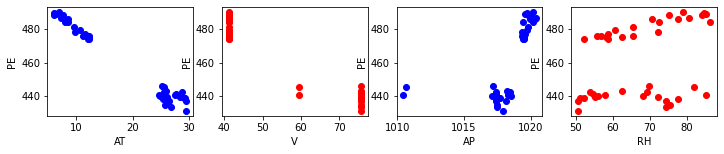

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(12,2))

axes[0].scatter(power_data['AT'], power_data['PE'],color="blue")
axes[0].set_xlabel('AT')
axes[0].set_ylabel('PE')

axes[1].scatter(power_data['V'], power_data['PE'],color="red")
axes[1].set_xlabel('V')
axes[1].set_ylabel('PE') 

axes[2].scatter(power_data['AP'], power_data['PE'],color="blue")
axes[2].set_xlabel('AP')
axes[2].set_ylabel('PE')

axes[3].scatter(power_data['RH'], power_data['PE'],color="red")
axes[3].set_xlabel('RH')
axes[3].set_ylabel('PE')

Separate the data as features and target

In [27]:
X = power_data.iloc[:, :-1].values
y = power_data.iloc[:, -1].values 

Splitting the dataset into the Training set and Test set

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Training the Multiple Linear Regression model on the Training set

In [29]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Predicting the Test set results

In [30]:
y_pred = regressor.predict(X_test)

In [31]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[439.70684271 433.48      ]
 [477.35105949 475.61      ]
 [479.47947684 479.21      ]
 [483.48175405 484.54      ]
 [488.19279714 488.57      ]
 [441.42991973 439.68      ]
 [483.85871448 486.15      ]
 [440.57537446 436.89      ]
 [437.8621346  440.28      ]]


 Find the r-squared for the regression on the training data

In [32]:
rsquared = regressor.score(X_train, y_train) 
print(f'Training data r-squared: {rsquared:.2}')

Training data r-squared: 0.98


Print out the coefficients for the features

In [33]:
regr_coef = pd.DataFrame(data=regressor.coef_,  columns=['Coefficient'], index= ['AT', 'V', 'AP', 'RH'])
regr_coef

,Coefficient
AT,-2.171626
V,-0.090017
AP,0.334373
RH,-0.064499
